In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Geometric Growth
Some random notes on geometric growth.  

In general, a random variable $S$ is undergowing geometric growth if over some sufficiently short time period:

$$
S_{n} - S_{n-1} = \Delta S_n = \mu_i S_{n-1}
$$

Where $\mu_i$ is a random growth rate which in general depends on the time period $\Delta t$:

$$
\mu_i = \mu \Delta t + \sigma \sqrt{\left( \Delta t \right)}  \epsilon_i
$$

where $\epsilon_i$ is a random (normal) variable with mean zero, standard devation 1 and no autocorrelation

The typical example is a stock where $\mu$ is the stocks average return per unit time and $\sigma$ is the standard deviation per square root unit time.  In the sequal we take $\Delta t = 1$ 

We note that if the value of $S$ at the initial time is $S_0$, then we have:

$$
\frac{S_i}{S_{i-1}} =  (1+\mu_i)
$$  

So that:

$$
\frac{S_N}{S_0} = \prod_{i=1}^{N} (1+\mu_i)
$$

So what do we mean by the 'average' growth? What we generally mean is what is the value $\mu_g$ such that over N periods:

$$
(1+\mu_g)^N = \frac{S_N}{S_0} = \prod_{i=1}^{N} (1+\mu_i)
$$

So:

$$
\mu_g  = \left(\prod_{i=1}^{N} (1+\mu_i)\right)^{1/N}-1
$$

This can be seen to be the geometric mean minus 1 of $1+\mu_i$.  This is easier if we use the log, where we just need to take the normal average of the 'log returns' defined as $\log(1+\mu_i)$

$$
\log(1+\mu_g) = \frac{1}{N} \sum_{i=1}^{N} \log(1+\mu_i)
$$


Now we note in the usual case where $\mu_i$ is small, we can use the approximation $\log(1+x)=x - x^2/2 + O(x^3)$.   From this we can see that:

$$
\hat{\mu_i} \equiv \log(1+\mu_i) = \mu_i + O(\mu_i^2)
$$ 

So for small enough time steps, we expect these two types of returns to become close. So does it matter which one we use? Yes!

Even though these log returns and simple returns are the same to lowest order, we have to be careful about forming expecations. To lowest order:

$$
\mu_g = \frac{1}{N} \sum_{i=1}^{N} (\mu_i - \mu_i^2 + ...) = \mu_a - \sigma^2/2 + ....
$$

where $\mu_a$ is the normal mean of returns, which in the limit should be $\mu$ (remember $\Delta t$ is 1)   This differnece between the 'geometric' mean and the 'arithmatic' mean is called often the 'volatility drag'. It can really make a difference if you make a mistake and use the wrong one.  

On the other hand if you have the geometric mean $\mu_g$ in hand, and you want to simulate the stock returns, you will want to correct it to $\mu$ by adding $\sigma^2/2$. Or better yet, simulate the log returns directly using (putting $\Delta t$ back in for completeness):

$$
\frac{S_n}{S_{n-1}} =  \exp(\mu_g \Delta t + \sigma \epsilon_i \sqrt{\left( \Delta t \right)})
$$  


## Demonstration 
Let's generate some random normals to simulate stock returns over some short time interval.
This represents $\mu_n=\frac {\Delta S_n}{S_{n-1}}$  

In [11]:
returns = pd.DataFrame({'simple_returns':np.random.normal(0,.2,100)})

In [12]:
returns.head()

,simple_returns
0,0.300686
1,0.163150
2,0.511334
3,0.178715
4,-0.058660


Since the total return is the product of factors like: $\left( 1 + \mu_n \right)$, it is useful to use the power of the log to turn this into a sum:

In [13]:
returns['log_returns']= np.log(1+returns['simple_returns'])
returns.head()

,simple_returns,log_returns
0,0.300686,0.262892
1,0.163150,0.151131
2,0.511334,0.412993
3,0.178715,0.164425
4,-0.058660,-0.060451


Note that these are extremely close.   This makes sense because for small $r_n$ we know that $\log(1+r_n) = r_n + O(r_n^2)$   However, one must be very careful ! Note:

In [14]:
returns.describe()

,simple_returns,log_returns
count,100.000000,100.000000
mean,0.011271,-0.008492
std,0.193049,0.205939
min,-0.609480,-0.940275
25%,-0.095641,-0.100529
50%,-0.005118,-0.005131
75%,0.151316,0.140906
max,0.511334,0.412993


We can verify that the mean log returns and mean simple returns are different by $\sigma^2/2$ as we derived above:

In [15]:
print(f"mean simple returns minus mean log returns: {returns['simple_returns'].mean()-returns['log_returns'].mean()}, sigma^2/2:\
       {returns['simple_returns'].std()**2/2}")

mean simple returns minus mean log returns: 0.019762627993721613, sigma^2/2:       0.018633892542050966


Also lets verify that the cumulative product $\prod_{i=1}^{N} (1+\mu_i)$ is the same as the exponential of the cumulative sum of the log returns.

In [16]:
returns['cum_return_from_log'] = np.exp(returns['log_returns'].cumsum())
returns['cum_return_from_simp'] =  (1+returns['simple_returns']).cumprod()
returns.tail()

,simple_returns,log_returns,cum_return_from_log,cum_return_from_simp
95,0.179990,0.165506,0.391868,0.391868
96,0.230514,0.207432,0.482199,0.482199
97,-0.016247,-0.016381,0.474364,0.474364
98,-0.017220,-0.017370,0.466196,0.466196
99,-0.082439,-0.086036,0.427763,0.427763


After N time steps, the resulting distribution of $\frac{S_N}{S_0}$ can be shown to be lognormal  median $(1+\mu_g)^N \approx \exp(N \mu_g)$ and with mean $\exp(N \mu_a)$. Let us verify that. 

In [22]:
# Takes geometric mean growth.
def simulate(mug,sigma,steps):
    data= np.random.normal(mug,sigma,steps)
    return np.exp(data.sum())
    

In the case we simulated above $\mu_a$ is zero, and $\mu_g$ is $-\sigma^2/2$ where $\sigma$ was 0.2 . Here I will put instead $\mu_g$ to be 0.08, so we expect $\mu_a$ to be :

In [69]:
.2**2/2.+.08

0.1

In [82]:
testdata = [simulate(0.08,.2,100) for i in range(10000)]

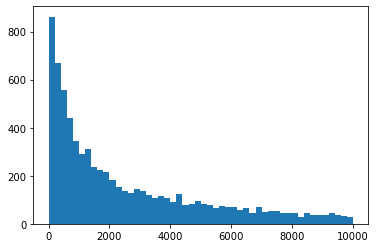

In [83]:
plt.hist(testdata,bins=50,range=(0,10000));

In [90]:
print(f"Average final value {np.mean(testdata)}, prediction: {np.exp(.1*100)}")
print(f"Meidan final value: {np.median(testdata)}, prediction: {np.exp(.08*100)}")

Average final value 19915.776516625607, prediction: 22026.465794806718
Meidan final value: 3157.6094196757376, prediction: 2980.9579870417283


Note that these two values are quite different.  The question you might ask, which one best describes the final distribution?  I hope it is obvious from looking at the historgram that the average final value is quite useless.

Verify the distribution appears lognormal, and note that the mean of the log is right at 8 as you would expect from above.

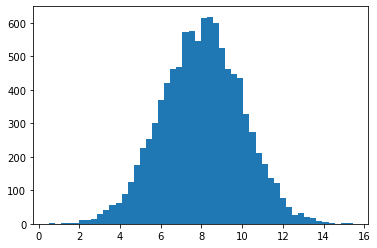

In [87]:
plt.hist(np.log(testdata),bins=50);